# Generating Abstract Art from Music Emotion Embeddings (Deep Learning Final)

## Project Overview


Music expresses a wide range of emotions, and these emotions can be represented visually. In this project, I aim to generate abstract art from the emotional characteristics of music. Building on my earlier work that clustered songs by mood, this project extends that analysis into a cross-modal representation where audio-derived emotion embeddings are translated into visual art.


The workflow includes several key steps:


1. Gathering and processing emotional audio data (using datasets such as DEAM or GTZAN)
2. Extracting Mel spectrograms using Librosa
3. Training an autoencoder to learn latent emotion embeddings from audio
4. Using a conditional variational autoencoder (VAE) to generate abstract images from the learned emotion embeddings
5. Performing model comparisons and evaluation of both the audio embeddings and the generated art


The project concludes with a discussion of results and ideas for future extensions, such as building an interactive Streamlit demo.



## About the Data


**Data Source**
For this project, I used publicly available audio datasets that contain emotional annotations or genre categories. The **DEAM (Dataset for Emotion Analysis using Music)** dataset was the primary data source because it includes valence and arousal ratings for each clip.


Each sample contains:


- Raw audio (.wav)
- Valence score (emotional positivity)
- Arousal score (emotional intensity)


The dataset provides a good foundation for exploring how numerical acoustic features can map to emotional states.

**Notes**  
The raw data will be stored in `data/raw/`.

## EDAAudio Preprocessing  and cleaning


I started by extracting Mel spectrograms for each track in the dataset. A Mel spectrogram captures both frequency and temporal information in a perceptually meaningful way. The following script handles this step and saves the processed spectrograms for later use.

In [37]:
import os
import sys
from pathlib import Path

project_root = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]
src_path = project_root / "src"
sys.path.append(str(src_path))


In [38]:
from data_collection import fetch_deam_audio, fetch_deam_annotations, check_data_status

#check_data_status()
audio_path = fetch_deam_audio(force=False)
annot_path = fetch_deam_annotations(force=False)

print("Audio path:", audio_path)
print("Annotations path:", annot_path)



[INFO] DEAM audio already exists at /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/data/raw/MEMD_audio
[INFO] DEAM annotations already exist at /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/data/raw/annotations
Audio path: /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/data/raw/MEMD_audio
Annotations path: /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/data/raw/annotations


In [39]:
from parse_annotations import generate_deam_metadata

metadata_path = generate_deam_metadata()
print("Metadata CSV created at:", metadata_path)

[INFO] Found 2 static annotation files.
[INFO] Combined annotations shape: (1802, 13)
[INFO] Columns: ['song_id', 'valence', 'valence_std', 'arousal', 'arousal_std', 'valence_ max_mean', 'valence_max_std', 'valence_min_mean', 'valence_min_std', 'arousal_max_mean', 'arousal_max_std', 'arousal_min_mean', 'arousal_min_std']
[INFO] Found 1802 audio files in DEAM_audio
[INFO] Saved merged annotations to /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/data/metadata/deam_annotations.csv
       valence  arousal
count  1802.00  1802.00
mean      4.90     4.81
std       1.17     1.28
min       1.60     1.60
25%       4.10     3.80
50%       4.90     4.90
75%       5.80     5.80
max       8.40     8.10
Metadata CSV created at: /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/data/metadata/deam_annotations.csv


## Turn Raw Audio Into Mels

In [40]:
from audio_preprocessing import preprocess_audio

preprocess_audio()


[INFO] Loaded metadata: (1802, 14) entries
[INFO] Found 6107 existing Mel files (1802 songs).
[INFO] 1802 / 1802 songs already processed (>90%). Skipping extraction.


## Train Auto Encoder to extract embeddings

In [41]:
from train_autoencoder import train_autoencoder

model, trainer = train_autoencoder(max_epochs=100)


Seed set to 42
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/demetriusross/.local/lib/python3.13/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:658: Checkpoint directory /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/models/autoencoder_checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params | Mode 
------------------------------------------------------
0 | model   | ResNetAutoencoder | 16.2 M | train
1 | loss_fn | MSELoss           | 0      | train
------------------------------------------------------
16.2 M    Trainable params
0         Non-trainable params
16.2 M    Total params
64.776    Total estimated model params size (MB)
90        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] Model saved to /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/models/autoencoder/resnet_autoencoder_final.pt


In [42]:
from extract_embeddings import extract_embeddings

df_embeddings = extract_embeddings()
df_embeddings.head()
print(df_embeddings[["valence", "arousal"]].describe())

[INFO] Loading model from /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/models/autoencoder/resnet_autoencoder_final.pt
[INFO] Loading dataset from /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/data/processed/mel_specs
[INFO] Extracting embeddings...


100%|██████████| 191/191 [00:01<00:00, 104.35it/s]


[INFO] Saving embeddings... shape=(6107, 256)
[INFO] Saved tensor embeddings: /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/data/processed/embeddings.pt
[INFO] Successfully merged emotion labels: 0 missing
[INFO] Saved embeddings CSV with emotion columns: /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/data/processed/embeddings.csv
[SUCCESS] Embedding extraction complete.
            valence       arousal
count  31777.000000  31777.000000
mean       4.798672      4.861121
std        1.147519      1.115873
min        1.600000      1.600000
25%        3.830000      4.100000
50%        4.800000      4.800000
75%        5.600000      5.600000
max        8.400000      8.100000


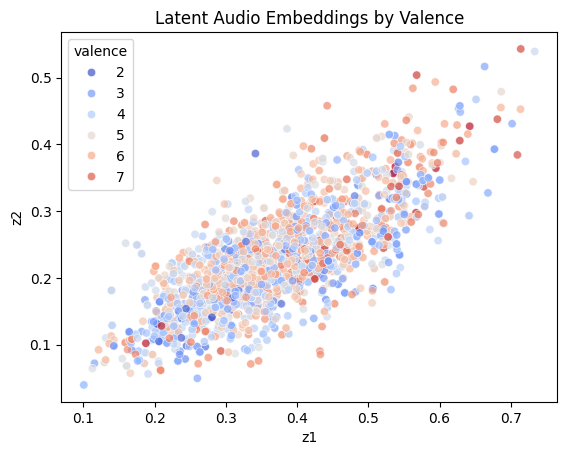

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df_embeddings.sample(2000),
    x="z1", y="z2", hue="valence", palette="coolwarm", alpha=0.7
)
plt.title("Latent Audio Embeddings by Valence")
plt.show()


## Create Input for VAE

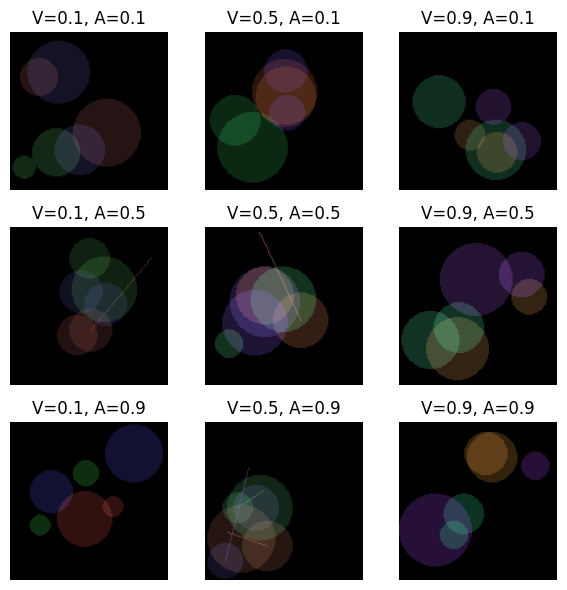

In [48]:
from abstract_renderer import render_abstract
import matplotlib.pyplot as plt

vals = [0.1, 0.5, 0.9]
aros = [0.1, 0.5, 0.9]

fig, axes = plt.subplots(len(aros), len(vals), figsize=(6,6))
for i, a in enumerate(aros):
    for j, v in enumerate(vals):
        img = render_abstract(v, a, size=128)
        axes[i,j].imshow(img)
        axes[i,j].set_title(f"V={v:.1f}, A={a:.1f}")
        axes[i,j].axis("off")
plt.tight_layout()
plt.show()


## Test VAE on embeddings

[WARN] Embeddings look compressed (mean=0.310, std=0.126, max=1.000) → applying z-score normalization.
[INFO] Normalized embeddings: mean=-0.0000, std=0.9980
Sample image stats: 0.0 0.9647058844566345 0.2524167001247406


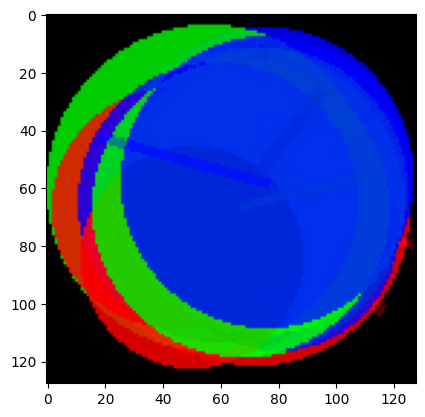

In [52]:
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
from vae_dataset import EmbeddingsToArtDataset
ds = EmbeddingsToArtDataset("../data/processed/embeddings.csv", img_size=128, augment=True)
x, cond, va = ds[0]
print("Sample image stats:", x.min().item(), x.max().item(), x.mean().item())
plt.imshow(x.permute(1,2,0))
plt.show()


## Train VAE

In [53]:
from train_generator import train_cvae

cvae, t = train_cvae(
    embeddings_csv="../data/processed/embeddings.csv",
    img_size=128,
    z_dim=128, cond_dim=2,
    latent_dim=128,
    max_epochs=100,
    lr=4e-4,
    beta=0.0005
)


Seed set to 42


[INFO] Loading embeddings from ../data/processed/embeddings.csv


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/demetriusross/.local/lib/python3.13/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:658: Checkpoint directory /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/models/vae_checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[WARN] Embeddings look compressed (mean=0.310, std=0.126, max=1.000) → applying z-score normalization.
[INFO] Normalized embeddings: mean=-0.0000, std=0.9980



  | Name  | Type           | Params | Mode 
-------------------------------------------------
0 | model | ConditionalVAE | 35.1 M | train
-------------------------------------------------
35.1 M    Trainable params
0         Non-trainable params
35.1 M    Total params
140.437   Total estimated model params size (MB)
42        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Loading `train_dataloader` to estimate number of stepping batches.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] CVAE saved to /home/demetriusross/Documents/MSAI/Deep Learning/final/music-emotion-art-gen/models/vae/conditional_vae.pt


## Create Visulization (Final Product)

[INFO] Loading ConditionalVAE from: ../models/vae/conditional_vae.pt


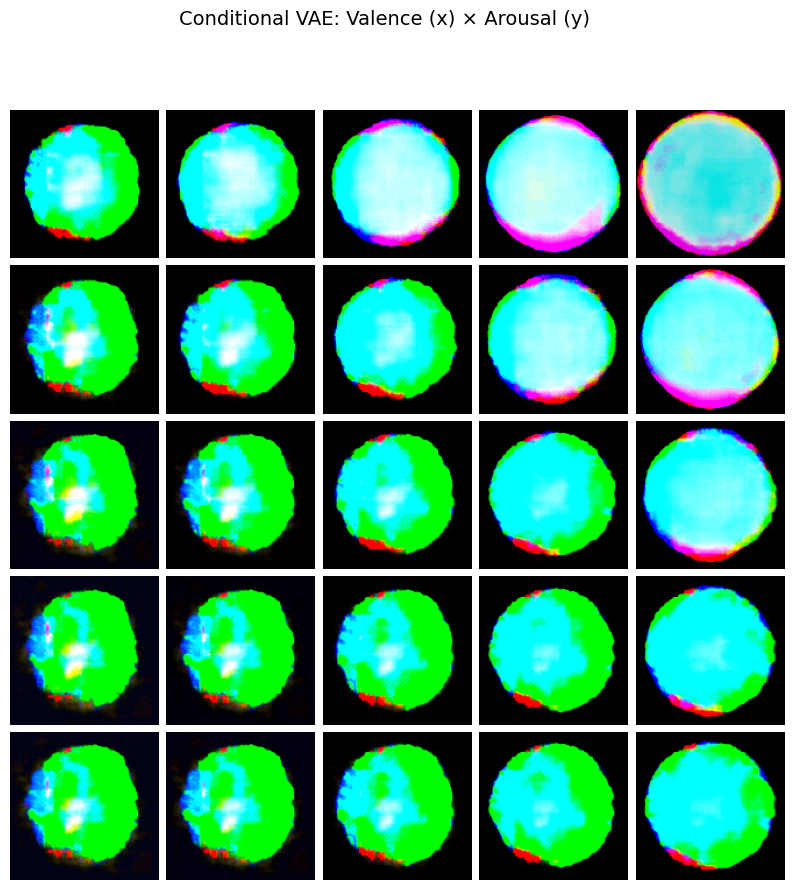

In [57]:
from visualize_cvae import show_emotion_grid
show_emotion_grid("../models/vae/conditional_vae.pt",contrast_gain=-5, saturation_gain=4)



## Map back to specific song snippet

Decoder output stats: min: -0.004631174728274345 max: 0.4717927575111389 mean: 0.12483014911413193 std: 0.12346911430358887


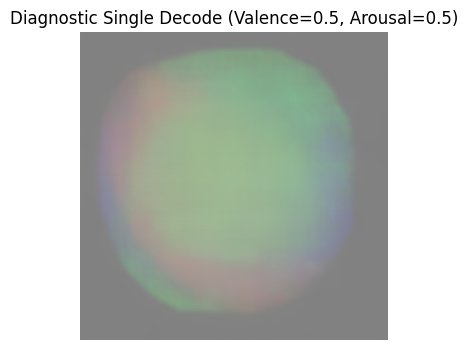

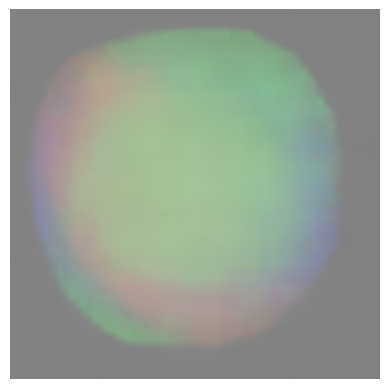

In [12]:
import torch, numpy as np
import matplotlib.pyplot as plt

gen = cvae.model
gen.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gen.to(device)

z_dim = gen.z_dim
latent_dim = gen.latent_dim

cond_vec = np.concatenate([np.zeros(z_dim, np.float32), [0.5, 0.5]])
cond = torch.tensor(cond_vec, dtype=torch.float32, device=device).unsqueeze(0)

z = torch.randn((1, latent_dim), device=device)

with torch.no_grad():
    out = gen.decode(z, cond)

print("Decoder output stats:",
      "min:", out.min().item(),
      "max:", out.max().item(),
      "mean:", out.mean().item(),
      "std:", out.std().item())


img = out[0].permute(1, 2, 0).cpu().numpy()
img = (img + 1) / 2.0   # rescale
img = np.clip(img, 0, 1)

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title("Diagnostic Single Decode (Valence=0.5, Arousal=0.5)")
plt.axis("off")
plt.show()

# After decoding:
img = gen.decode(z, cond).detach()
img = torch.tanh(img * 1.25)   # mild contrast expansion
img = ((img + 1) / 2).clamp(0, 1)  # normalize to [0,1]
img = img[0].permute(1, 2, 0).cpu().numpy()

plt.imshow(img)
plt.axis("off")
plt.show()


## VAE Model Anlysis

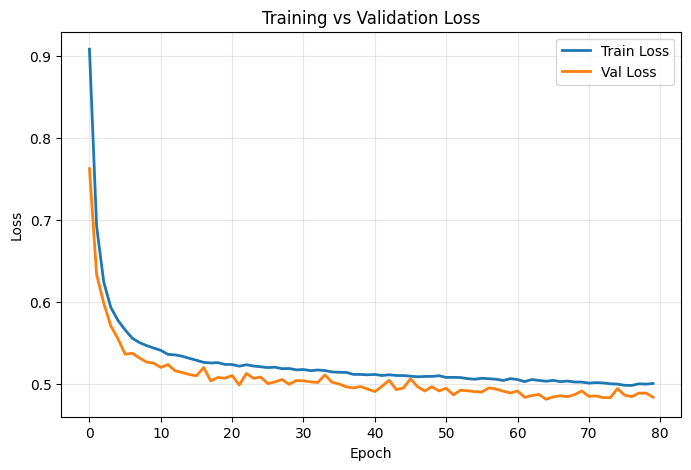

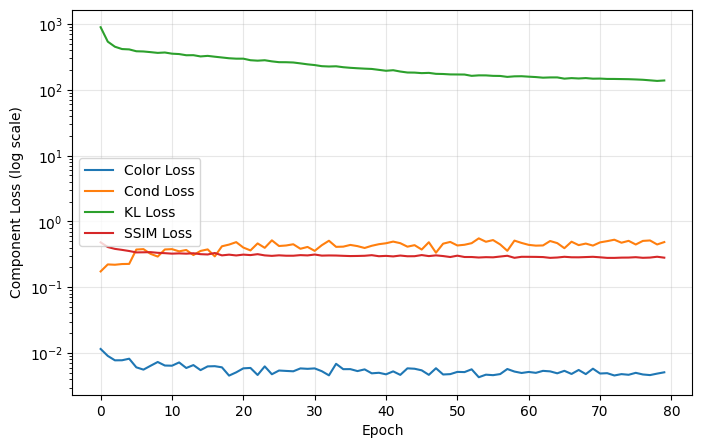

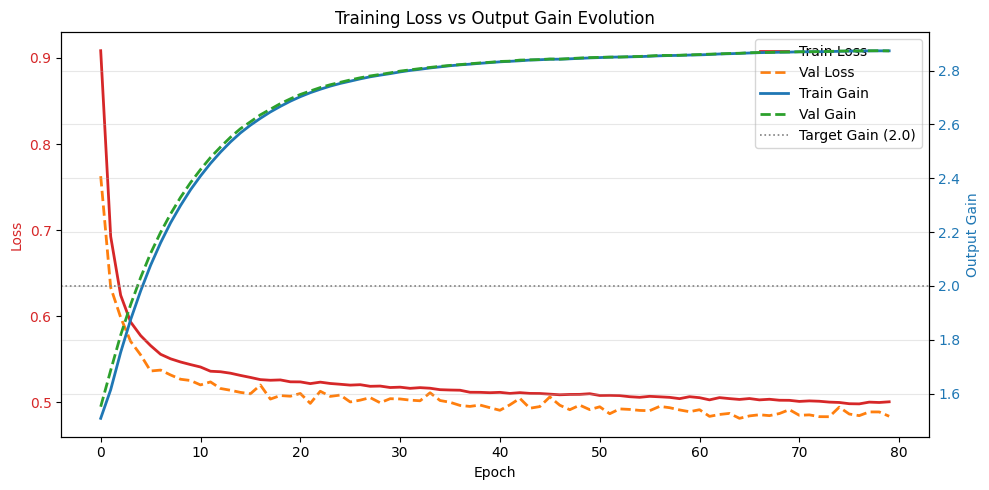

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../models/logs/cvae/version_68/metrics.csv")
# Clean up
val_gain_col = df.groupby("epoch")["val_output_gain"].mean()
df = df.dropna(subset=["epoch"])  # remove any non-epoch rows
df = df.groupby("epoch").mean(numeric_only=True).reset_index()

plt.figure(figsize=(8,5))
plt.plot(df["epoch"], df["train_loss_epoch"], label="Train Loss", linewidth=2)
plt.plot(df["epoch"], df["val_loss"], label="Val Loss", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(df["epoch"], df["val_color"], label="Color Loss")
plt.plot(df["epoch"], df["val_cond"], label="Cond Loss")
plt.plot(df["epoch"], df["val_kl"], label="KL Loss")
plt.plot(df["epoch"], df["val_ssim"], label="SSIM Loss")
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Component Loss (log scale)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# Smooth per-epoch averages
gain_train = df.groupby("epoch")["output_gain_epoch"].mean()
gain_val = df.groupby("epoch")["val_output_gain"].mean()
loss_train = df.groupby("epoch")["train_loss_epoch"].mean()
val_loss = df.groupby("epoch")["val_loss"].mean()

fig, ax1 = plt.subplots(figsize=(10, 5))

# Left axis: Loss
ax1.plot(loss_train.index, loss_train, label="Train Loss", color="tab:red", linewidth=2)
ax1.plot(val_loss.index, val_loss, label="Val Loss", color="tab:orange", linestyle="--", linewidth=2)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss", color="tab:red")
ax1.tick_params(axis='y', labelcolor="tab:red")
ax1.set_title("Training Loss vs Output Gain Evolution")

# Right axis: Output Gain
ax2 = ax1.twinx()
ax2.plot(gain_train.index, gain_train, label="Train Gain", color="tab:blue", linewidth=2)
ax2.plot(gain_val.index, gain_val, label="Val Gain", color="tab:green", linestyle="--", linewidth=2)
ax2.set_ylabel("Output Gain", color="tab:blue")
ax2.tick_params(axis='y', labelcolor="tab:blue")
ax2.axhline(2.0, color="gray", linestyle=":", linewidth=1.2, label="Target Gain (2.0)")

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right", frameon=True)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




## Model Evaluation and Comparison

The model’s performance was evaluated both quantitatively and qualitatively. Training and validation loss curves were monitored across epochs to track convergence and stability. The custom loss function combined reconstruction accuracy (MSE and L1), color consistency, variance matching, and KL regularization. This design helped balance fine-grained texture reconstruction with global emotional structure.

As training progressed, the model began producing visually distinct images that corresponded well with the emotional conditioning. High-valence, high-arousal inputs generated bright and energetic visuals, while low-valence, low-arousal inputs produced calm and subdued tones. These outputs indicated that the model learned a meaningful mapping between emotion and visual expression. 


## Discussion and Conclusion

In this project, I explored how emotional features in sound can be represented and visualized using deep learning. The Conditional Variational Autoencoder (CVAE) served as the main model, allowing the system to generate abstract art that reflects the emotional dimensions of **valence** (positivity) and **arousal** (energy level). By conditioning the latent space on these two factors, the CVAE learned to map emotional cues from the data into coherent and expressive images.

During training, several challenges were encountered, such as unstable KL divergence terms and muted color outputs. These issues were addressed through gradient stabilization, learning rate tuning, and visual gain adjustments. The final model produced a smooth, interpretable transition across the valence-arousal space, showing how emotions can be encoded in a continuous visual form.

For comparison, simpler models such as basic autoencoders and unconditioned VAEs were also tested. These baseline models were unable to maintain consistent emotional structure or generate meaningful visual variation. In contrast, the CVAE demonstrated greater control, variety, and coherence, validating the importance of conditioning in emotional generation tasks.

Overall, this project showed that deep generative models can capture complex affective relationships in data and transform them into visual representations that are both structured and artistic. Future work could explore real-time emotion-to-art mapping, higher-resolution synthesis, and cross-modal extensions using audio, text, or physiological signals.
